The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


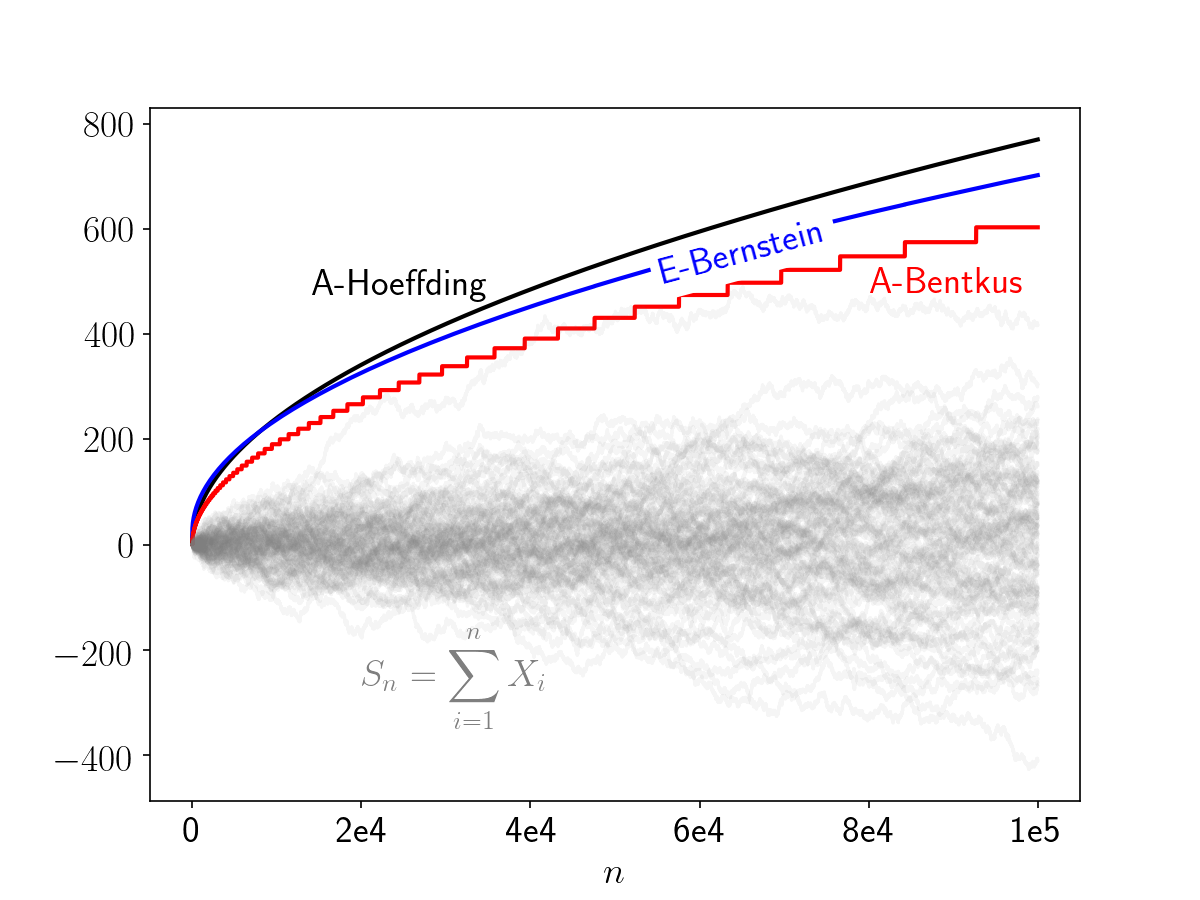

Hoeffding $0.0$,
Bernstein $0.0$,
Bentkus $0.001$.


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
import scipy.optimize
import scipy.special
import time

from matplotlib import rc
plt.style.use('default')
rc('text', usetex=True)

from conc_ineq.hoeffding import adaptive_hoeffding_seq
from conc_ineq.bernstein import empirical_bernstein_seq_known_var
from conc_ineq.bentkus import adaptive_bentkus_seq_known_var

### Xi ~ Bernoulli(p)
np.random.seed(234)
p = 0.25
A = np.sqrt(p*(1-p)) # i.e. A = np.sqrt(3)/4 
B = 1 - p

delta = 0.05

N = int(1e5)
ns = np.arange(1, N+1)
rep = 3000

eta = 1.1
power = 1.1



f_ah = adaptive_hoeffding_seq(N, delta, upper=1, lower=0)
f_bn = empirical_bernstein_seq_known_var(N, delta, A=A, B=B, eta=eta, power=power)
f_bk = adaptive_bentkus_seq_known_var(N, delta, A=A, B=B, eta=eta, power=power)


fig = plt.figure(figsize=(8, 6))
plt.plot(ns, f_ah, 'k', linewidth=2)
plt.plot(ns, f_bn, 'b', linewidth=2)
plt.plot(ns, f_bk, 'r', linewidth=2)

fail_h = 0.
fail_bs = 0.
fail_ref = 0.

for ii in range(rep):
    X = np.random.binomial(1, p=p, size=(N,)) - p
    Sn = np.cumsum(X)
    if ii % 30 == 1 or np.any(Sn >= f_bk):
        plt.plot(ns, Sn, '-', color='C7', alpha=0.07)
        
    fail_h += np.any(Sn >= f_ah)
    fail_bs += np.any(Sn >= f_bn)
    fail_ref += np.any(Sn >= f_bk)

    

plt.xlabel(r'$n$', fontsize=18)
plt.text(14000, f_ah[15000]+180, 'A-Hoeffding', rotation=0, color='k',fontsize=18,  backgroundcolor='None')
plt.text(55000, f_bn[55000]-30, 'E-Bernstein', rotation=15, color='b',fontsize=18, backgroundcolor='w')
plt.text(80000, f_bk[80000]-70, 'A-Bentkus', rotation=0, color='r',fontsize=18, backgroundcolor='None')
plt.text(20000, -350, r'$$S_n = \sum_{i=1}^n X_i$$', rotation=0, color='C7', fontsize=18, backgroundcolor='None')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks([0, 2e4, 4e4, 6e4, 8e4, 1e5], ['0', '2e4', '4e4', '6e4', '8e4', '1e5'])
#plt.savefig('./figure/adaptive_bernoulli.pdf', bbox_inches='tight', pad_inches=0)


print("Hoeffding ${}$,".format(
    np.round(fail_h/rep, 5),
))

print("Bernstein ${}$,".format(
    np.round(fail_bs/rep, 5),
))

print("Bentkus ${}$.".format(
    np.round(fail_ref/rep, 5),
))
